Even in 2D, data shows that most of the circuits in the heterogeneous sample would exhibit ADHP-induced limit cycles for some of ADHP metaparameter space. Most all of them also have a solution that does not use an ADHP-induced limit cycle to stabilize pyloricness. 
I only gathered this data for the heterogeneous circuits, not the "main" dataset. I expect that the main (homogeneous) dataset does not have as many. But the story would be very different if I told it with this dataset then. Instead of a thing that only comes into play when we consider higher dimensions, long-timescale limit cycles become a very real consideration that needs to be considered always. And as we have seen a little bit, it muddies the visualizations quite a bit, as well. 


What would it mean to acknowledge this sooner as one of the "things that throws off our predictions" in the heterogeneous solutions? All that we would need to make sure the narrative doesn't get too thrown off is that most all of the predictions still work in the heterogeneous dataset. This *should* be the case because pretty much all the ones that were solvable could do so with a steady state mechanism, indicating separability. We already have HPparslices for all the heterogeneous ones n order to add them in, 

And then I assume that #86, which ONLY can be solved with an HPLC, is structurally unstable. Therefore the same narrative can be used as for homogeneous#18 in 3d; we expected this one to be completely unsolvable, but it was solvable because of an HPLC. 

In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
num_with_hplc = 0
num_hplc_is_solution = 0
num_with_nonhpcl_solutions = 0
num_with_both = 0
for i in range(100):
    hplc = np.loadtxt('./%s/HPLC.dat'%i)
    metaparspace = np.loadtxt('./%s/HPparslice_newrho_res5.dat'%i)
    contains_hplc = hplc.any()
    num_with_hplc += contains_hplc
    hplc_is_solution = 0

    fully_solved = np.where(metaparspace==25)
    hplc_is_solution = hplc[fully_solved].any()
    pts_where_hplc_is_solution = sum(hplc[fully_solved])
    num_hplc_is_solution += hplc_is_solution

    reversehplc = -(hplc.copy()-1)
    nonhplc_is_solution = reversehplc[fully_solved].any()
    num_with_nonhpcl_solutions += nonhplc_is_solution
    if nonhplc_is_solution and hplc_is_solution:
        num_with_both += 1
    if hplc_is_solution:
        print(i, ": ", pts_where_hplc_is_solution," has nonHPLC solution?:", nonhplc_is_solution)
print(num_with_hplc,num_hplc_is_solution,num_with_nonhpcl_solutions, num_with_both)

0 :  60.0  has nonHPLC solution?: True
1 :  133.0  has nonHPLC solution?: True
7 :  52.0  has nonHPLC solution?: True
17 :  176.0  has nonHPLC solution?: True
27 :  52.0  has nonHPLC solution?: True
28 :  13.0  has nonHPLC solution?: True
36 :  31.0  has nonHPLC solution?: True
40 :  7.0  has nonHPLC solution?: True
43 :  48.0  has nonHPLC solution?: True
46 :  30.0  has nonHPLC solution?: True
51 :  298.0  has nonHPLC solution?: True
52 :  27.0  has nonHPLC solution?: True
53 :  3.0  has nonHPLC solution?: True
63 :  238.0  has nonHPLC solution?: True
64 :  30.0  has nonHPLC solution?: True
67 :  92.0  has nonHPLC solution?: True
80 :  47.0  has nonHPLC solution?: True
81 :  2.0  has nonHPLC solution?: True
86 :  21.0  has nonHPLC solution?: False
89 :  22.0  has nonHPLC solution?: True
90 :  35.0  has nonHPLC solution?: True
91 :  69.0  has nonHPLC solution?: True
93 :  68.0  has nonHPLC solution?: True
96 :  61.0  has nonHPLC solution?: True
99 :  123.0  has nonHPLC solution?: True


So most every circuit that has an hplc solution also has a non-hplc solution. All but one: # 86. #86 might be structurally unstable. Idk i haven't gathered pyloric and average data. That would be cool, though

In [ ]:
#see if this accords with the HP-off data
num_solvable_withoutHPon =0
for i in range(100):
    metaparspace_HPoff = np.loadtxt('./%s/HPparslice_newrho_res5_HPofftest.dat'%i)
    solvable_withoutHPon = (metaparspace_HPoff>22).any()
    num_solvable_withoutHPon += solvable_withoutHPon
print(num_solvable_withoutHPon)

82


So yeah it basically does accord with HP off data... there are two where it doesn't make sense because they supposedly don't work without ADHP but yet have solutions where an HPLC wasn't detected. this could be an HPLC detection error (like too generous of a threshold) or a result of some difference in calculation procedure (like they needed the extra 50 seconds of HPLC detection time to reach a steady state solution)

When you compare the distributions, some of them look totally different with HP on and off

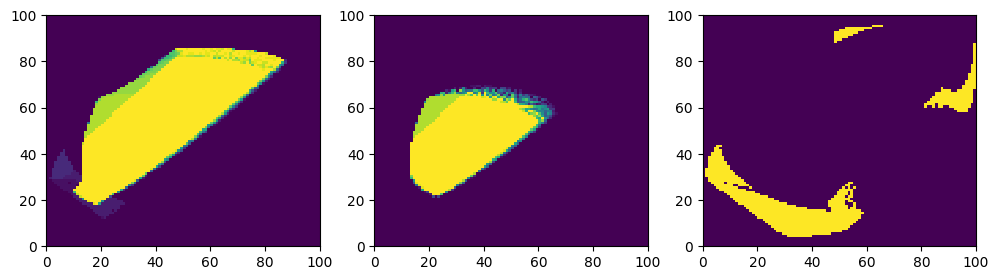

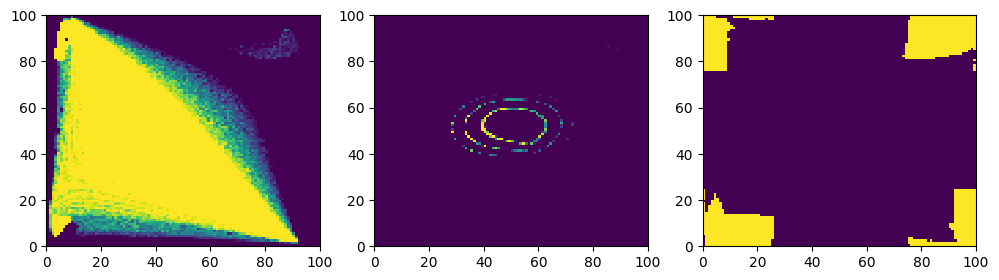

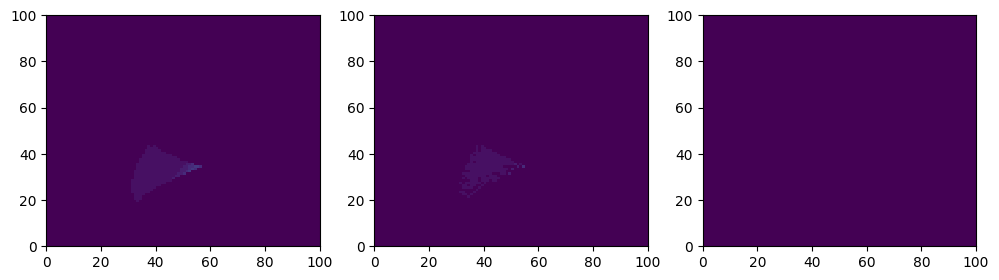

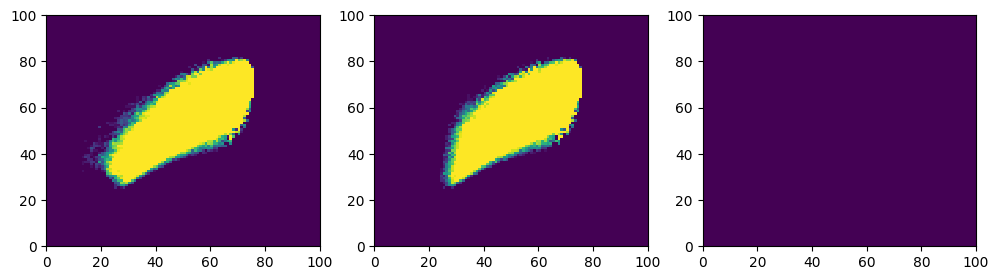

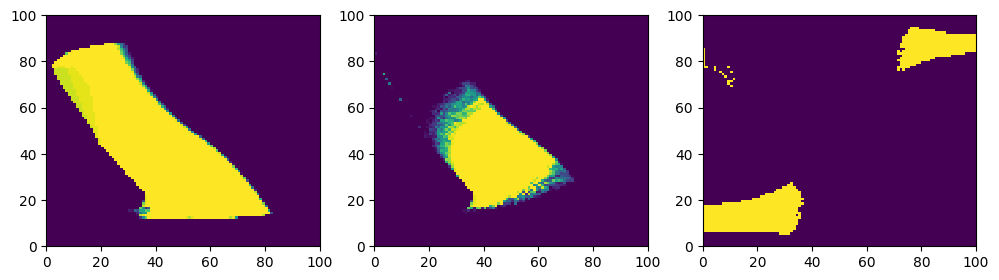

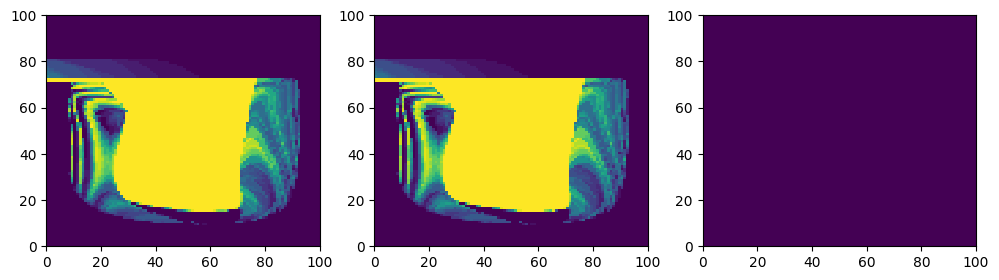

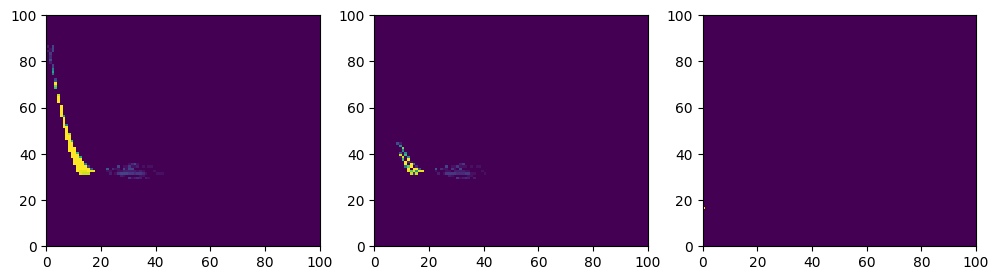

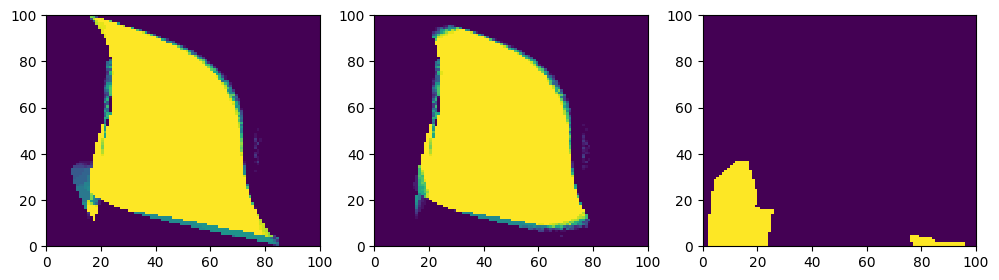

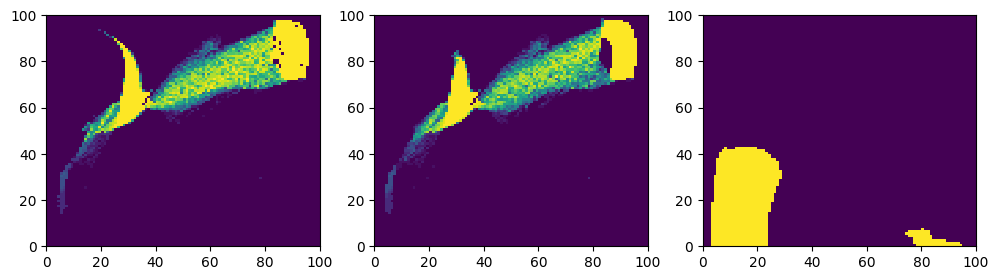

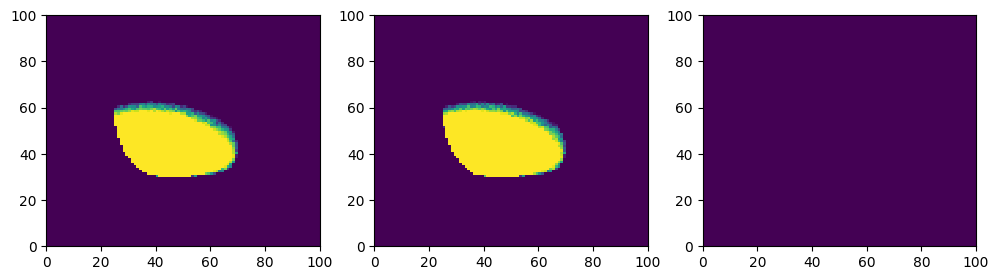

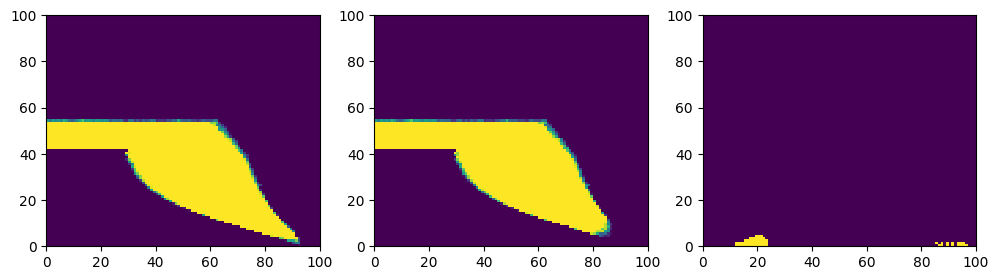

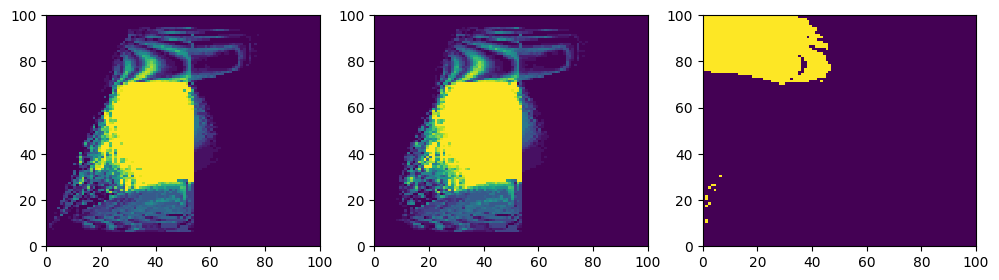

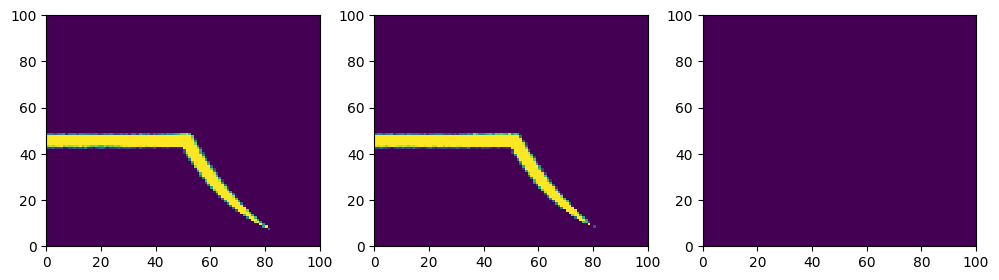

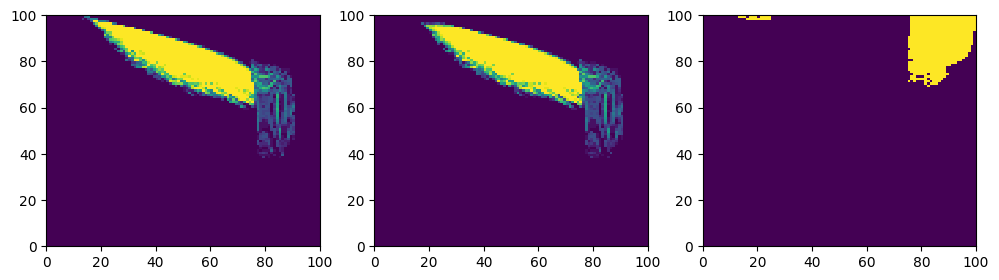

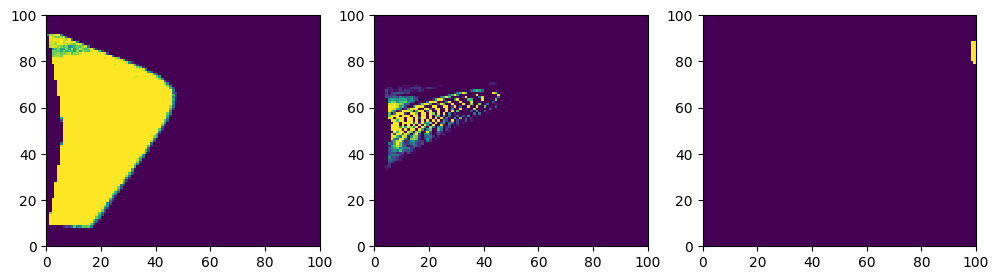

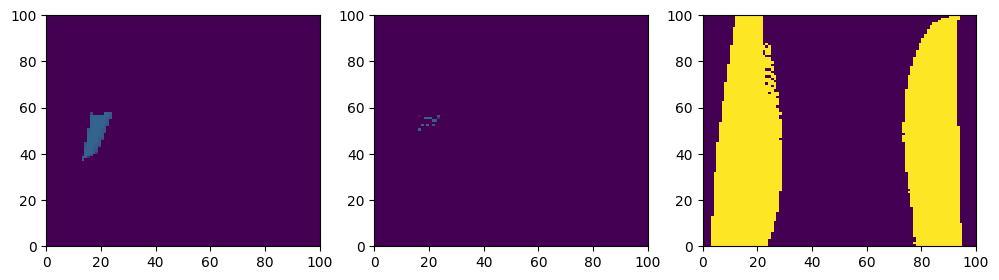

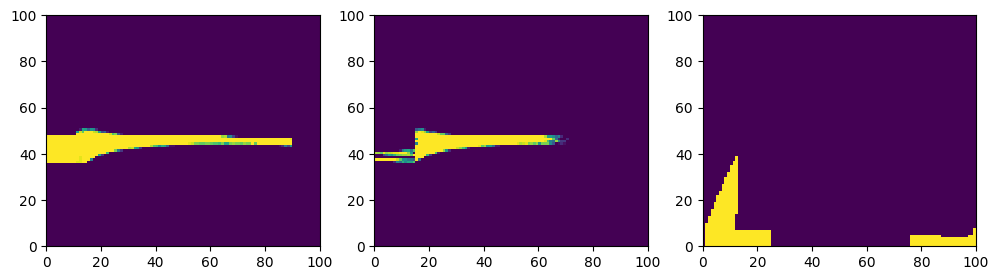

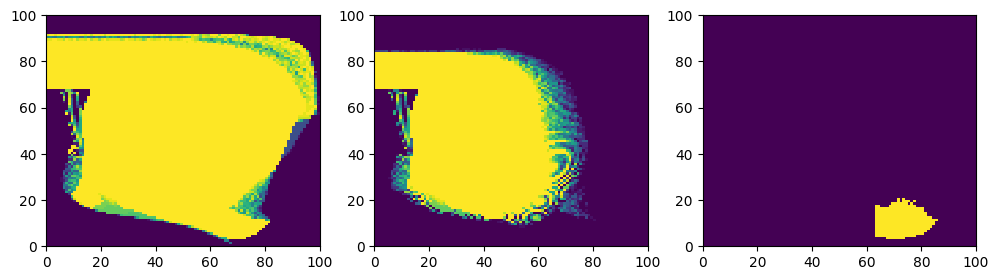

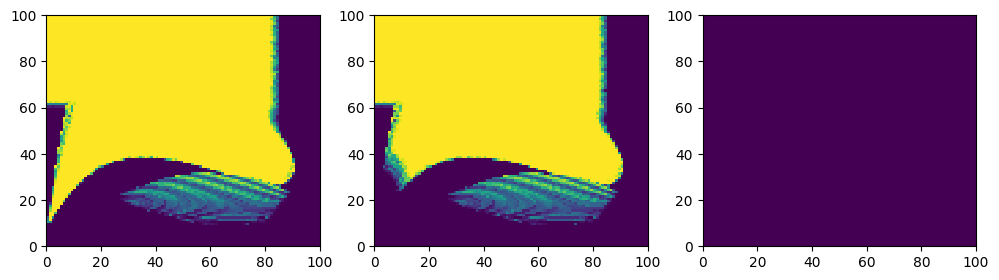

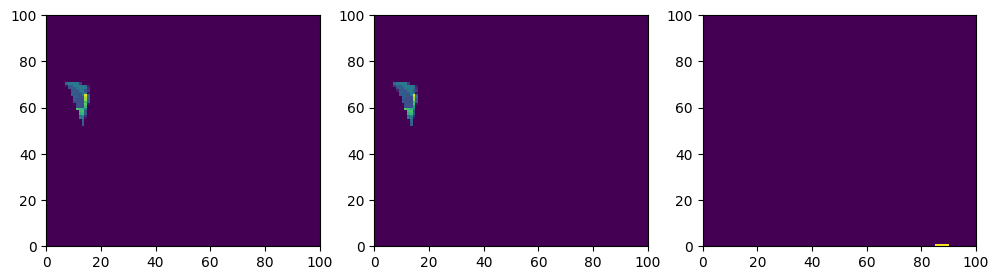

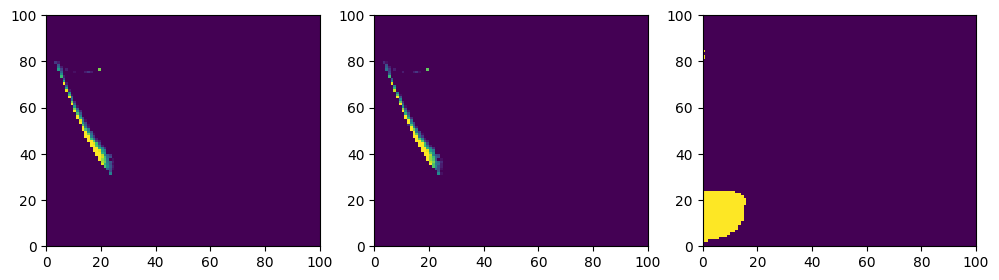

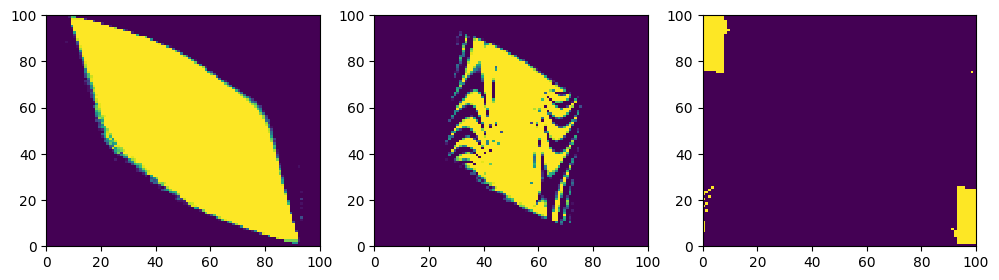

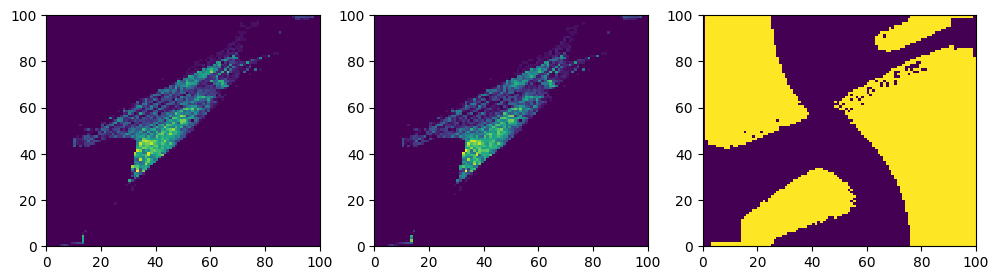

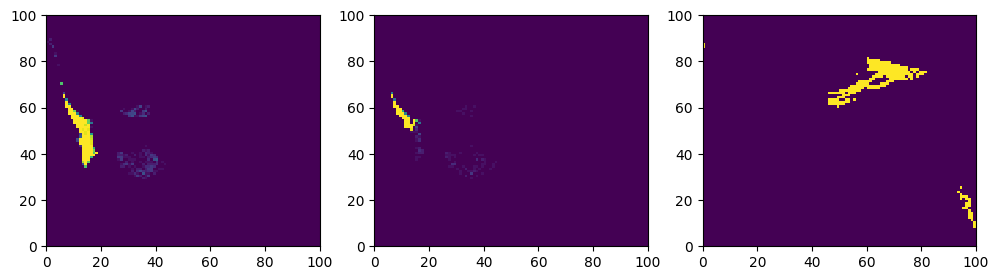

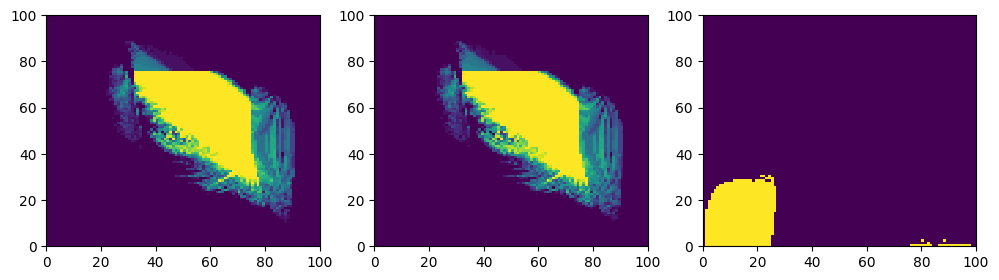

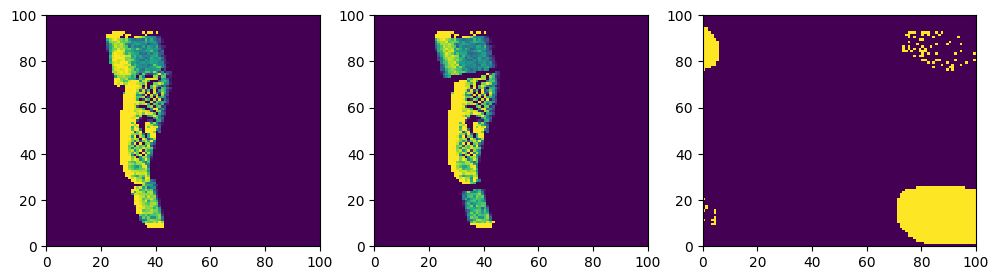

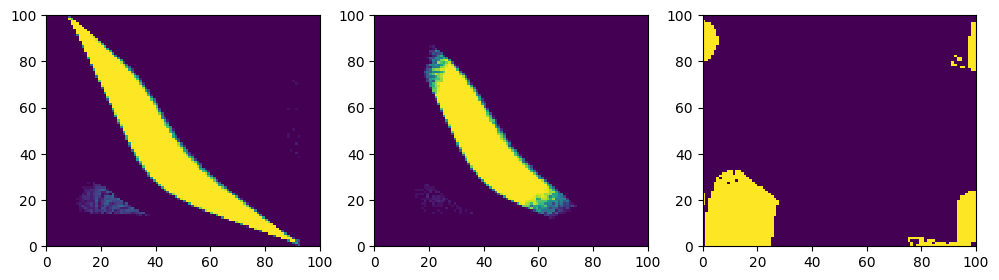

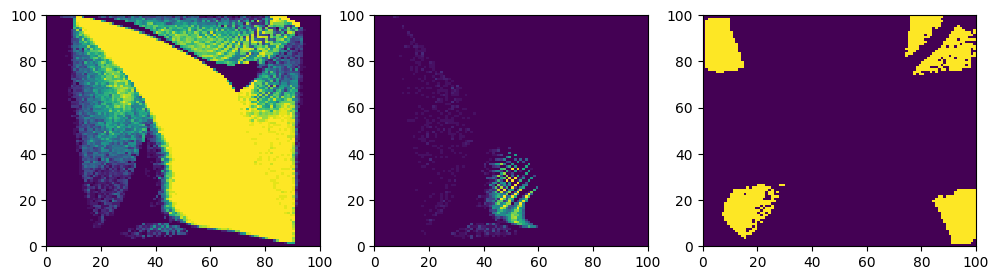

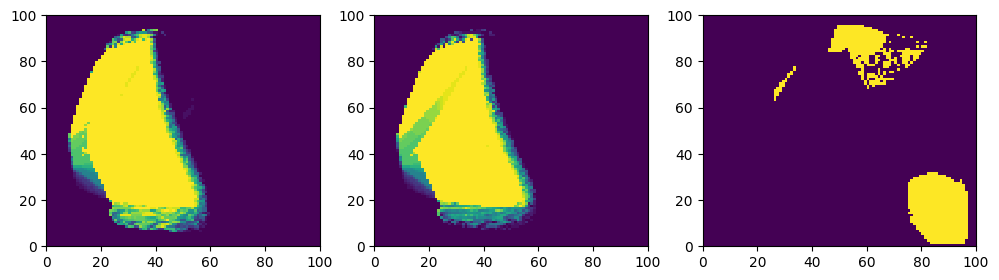

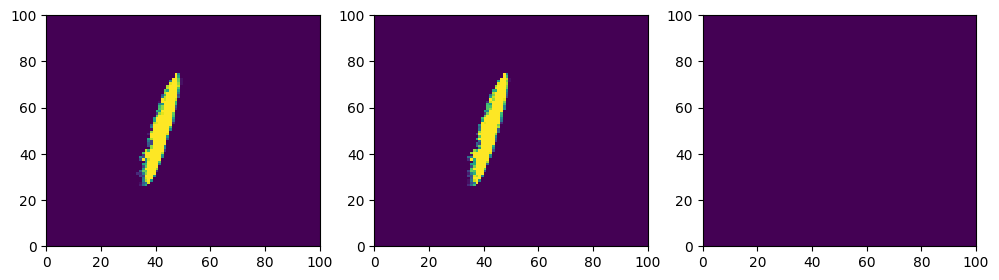

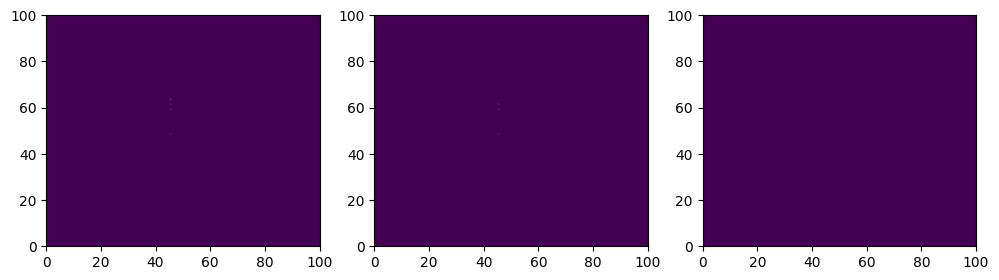

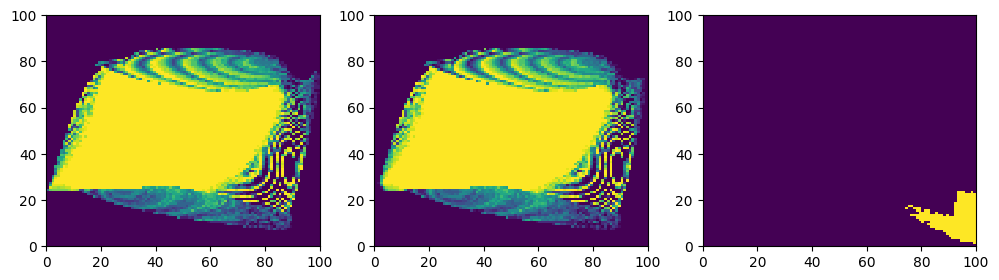

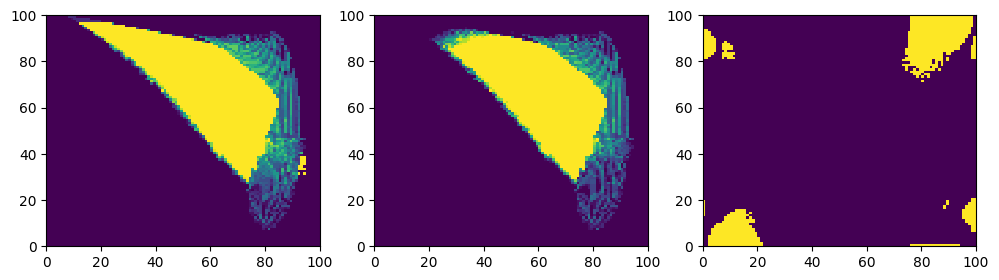

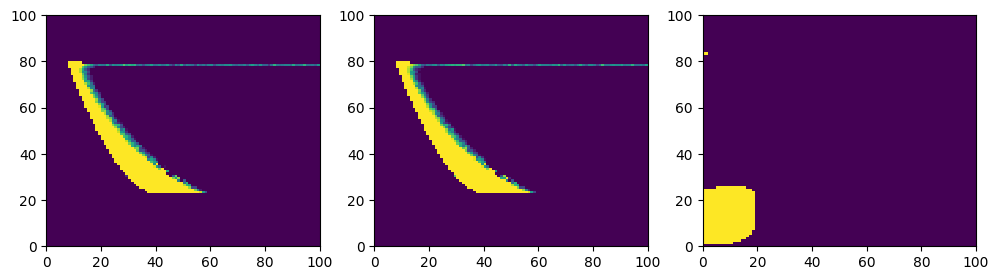

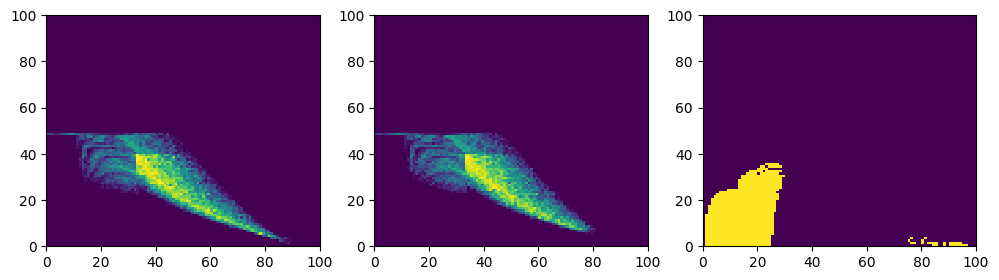

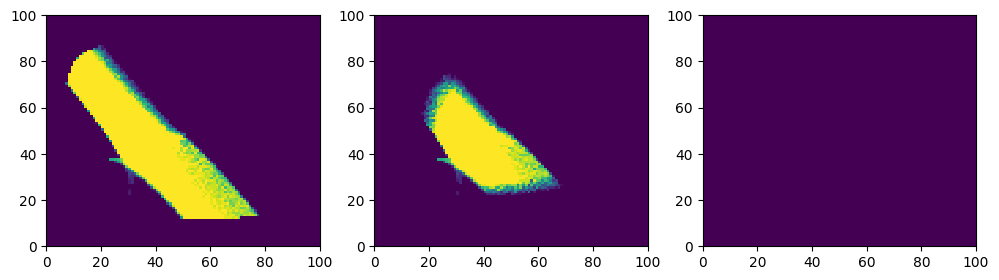

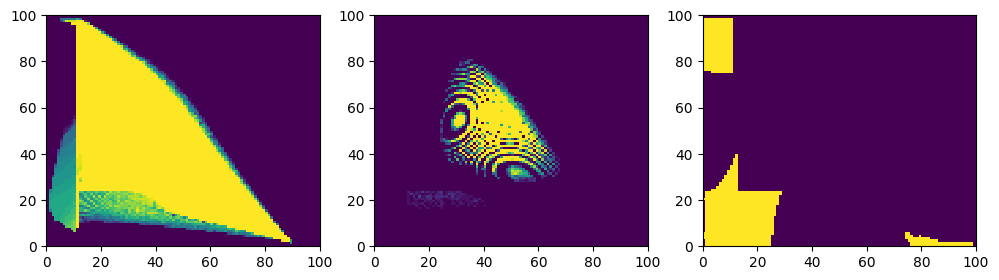

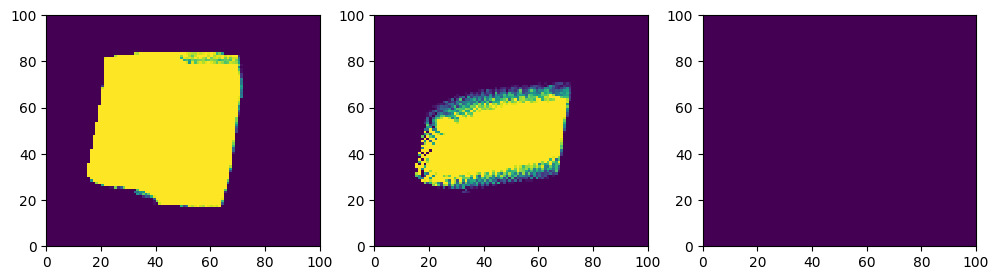

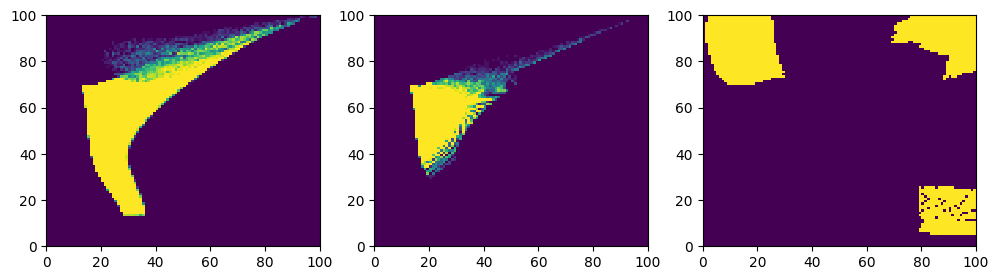

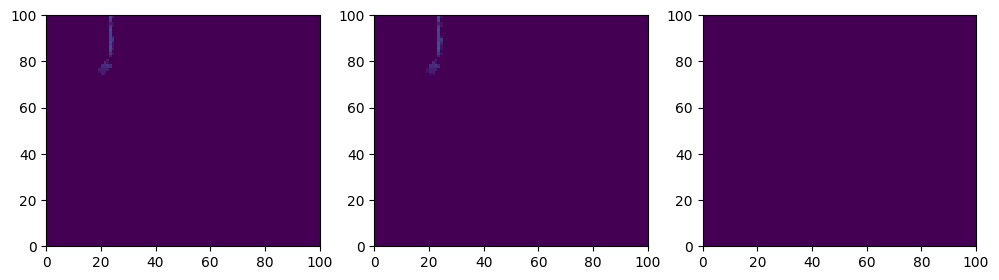

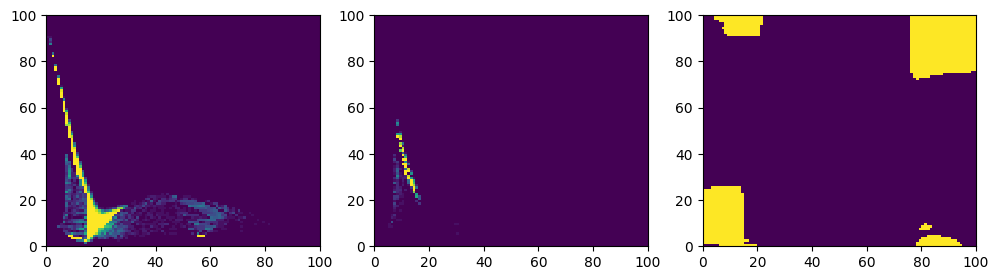

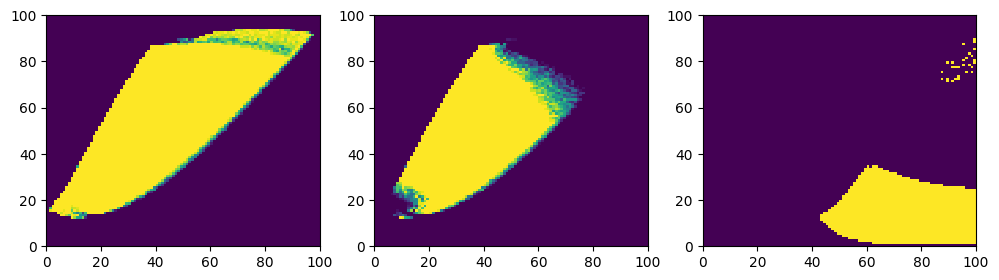

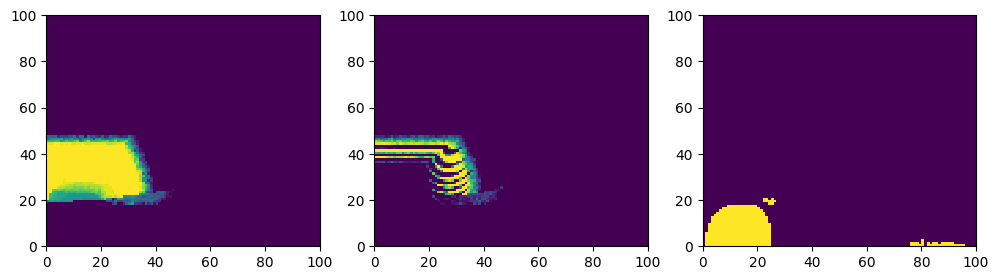

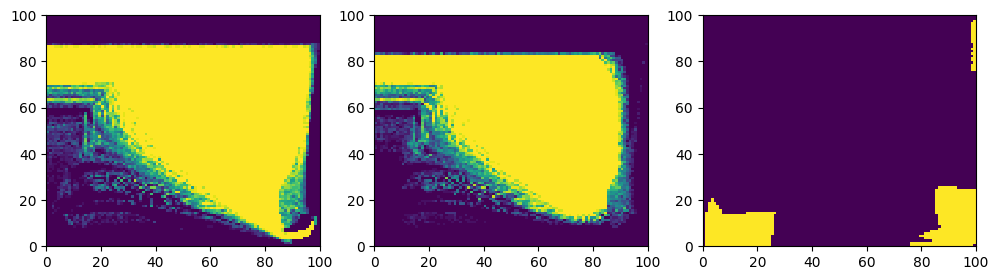

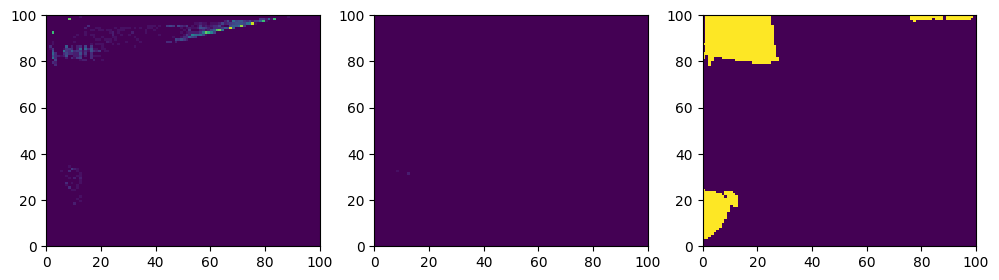

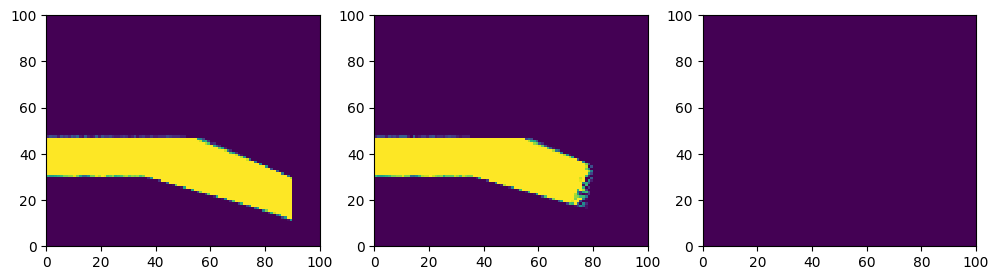

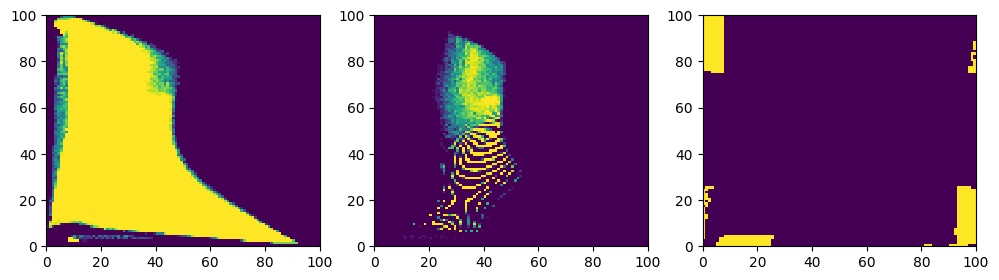

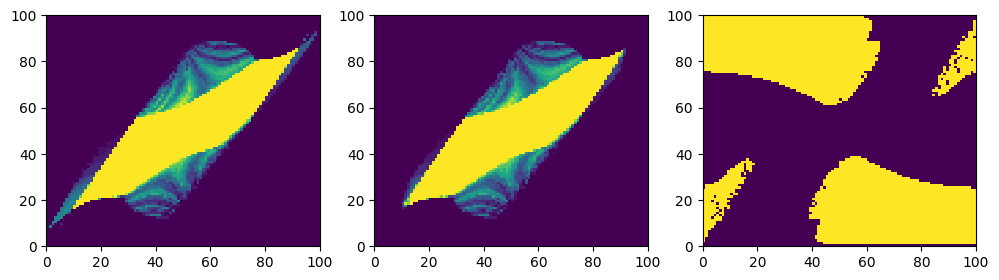

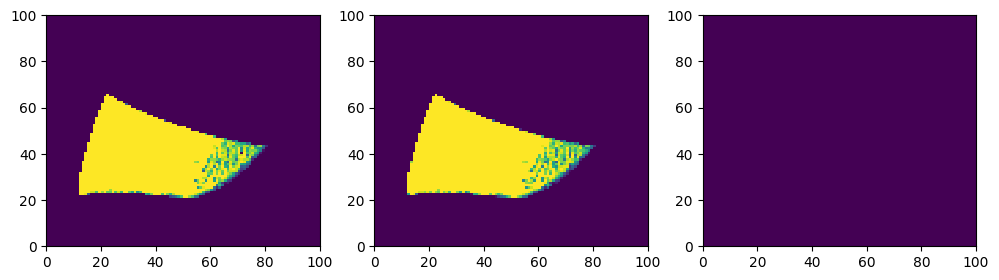

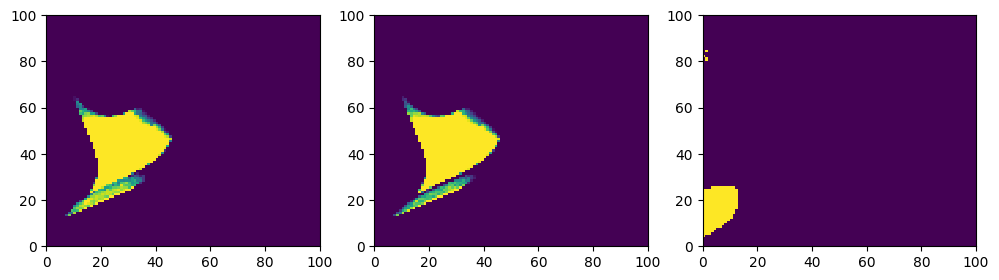

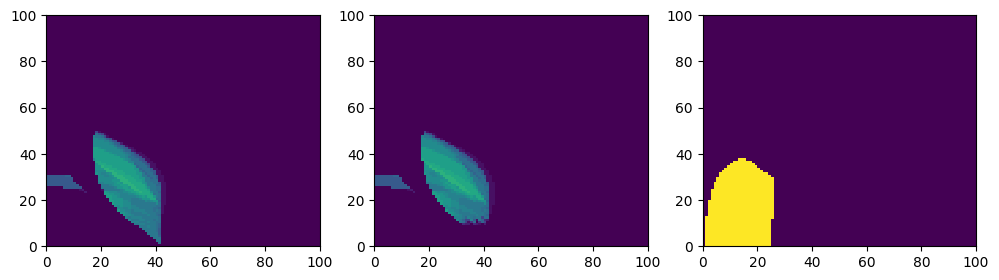

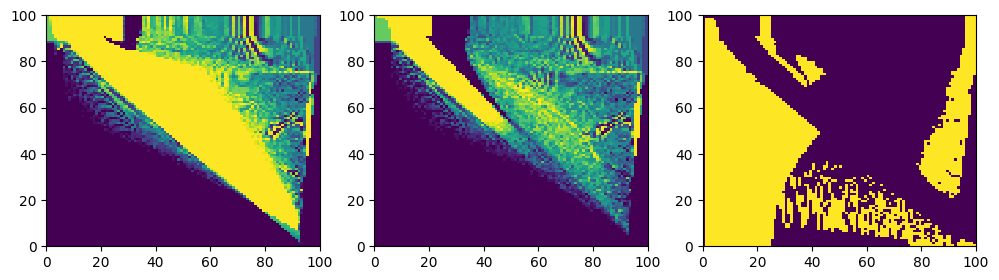

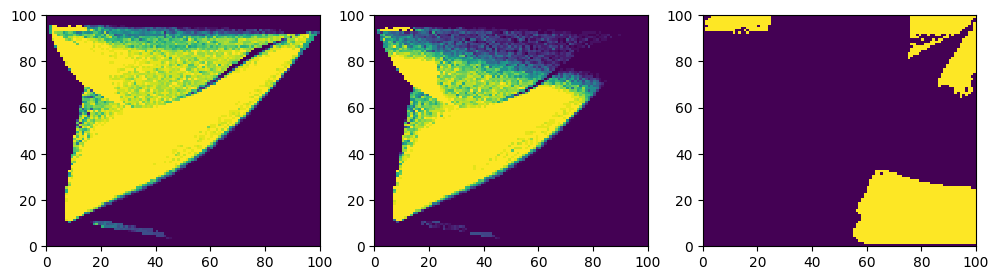

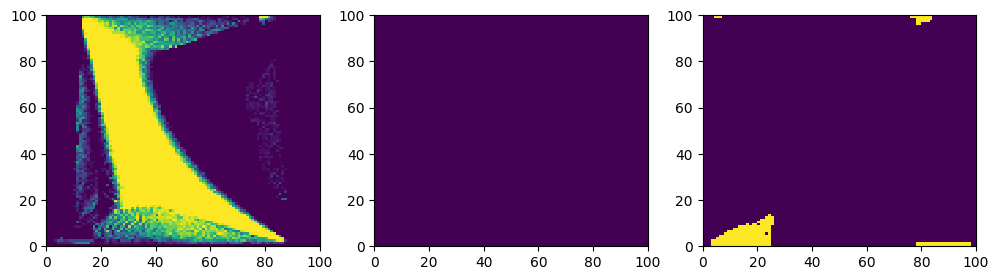

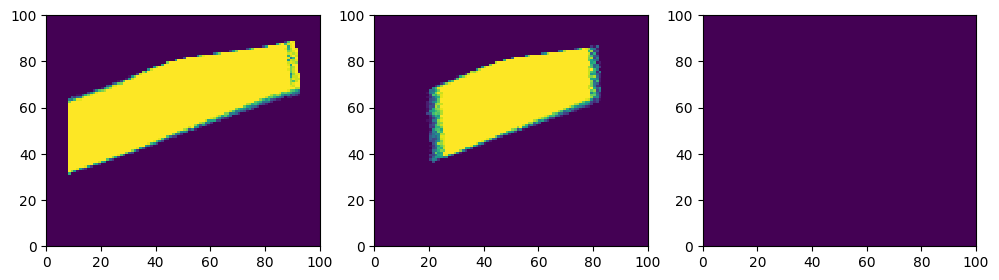

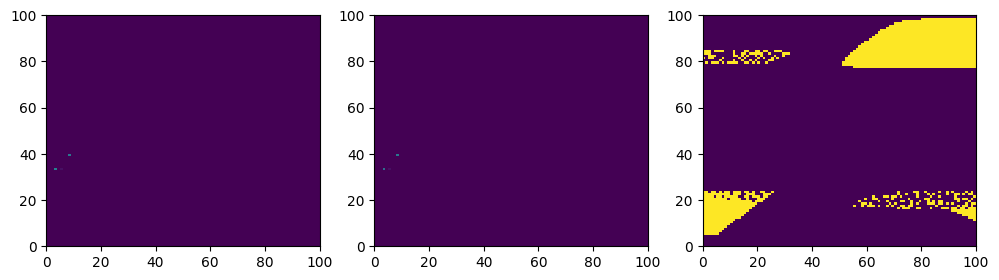

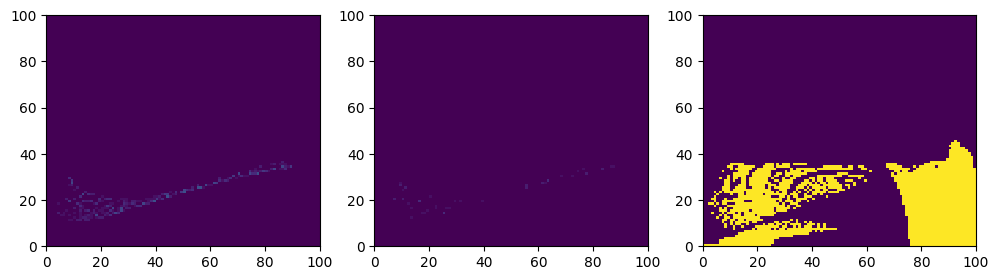

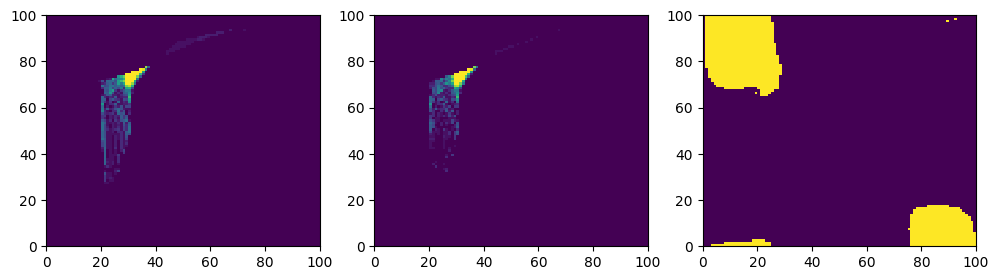

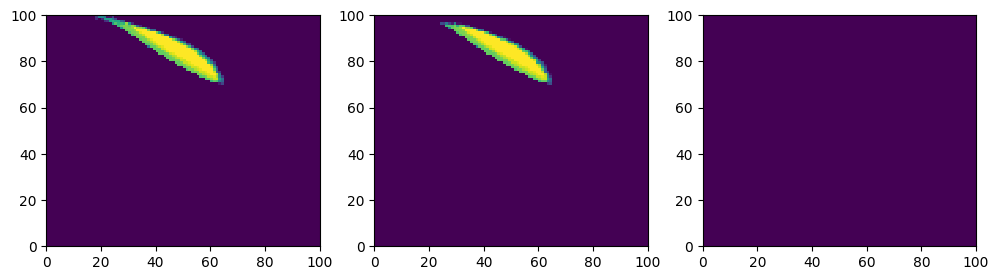

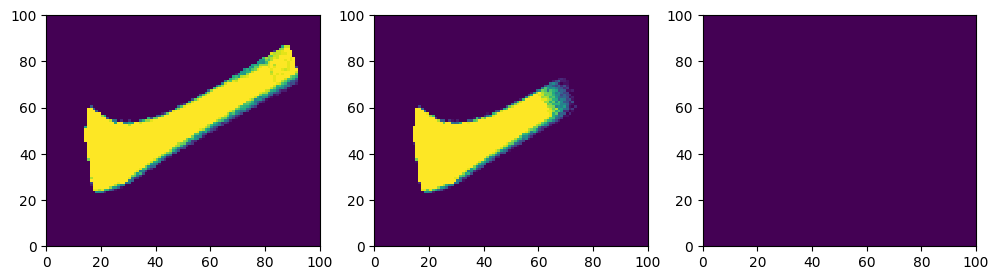

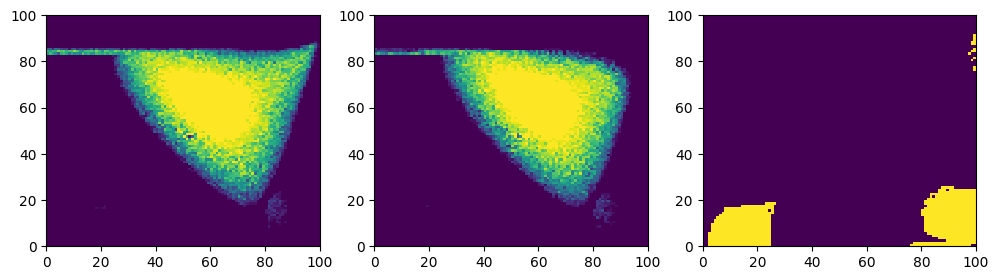

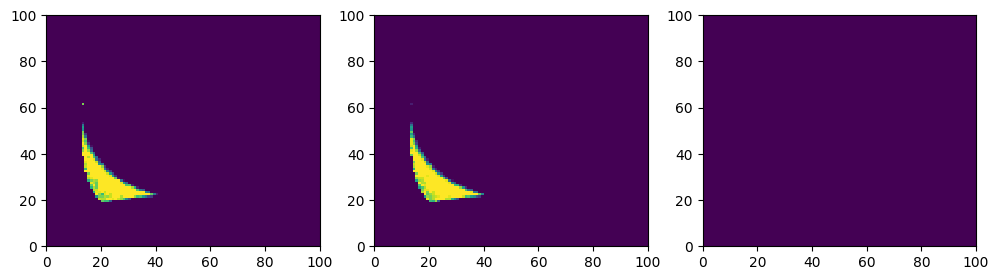

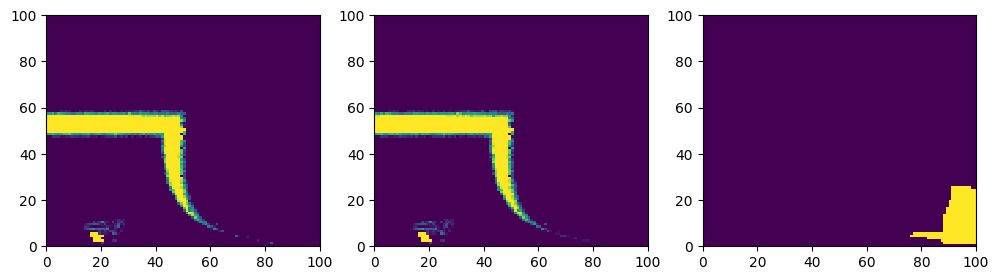

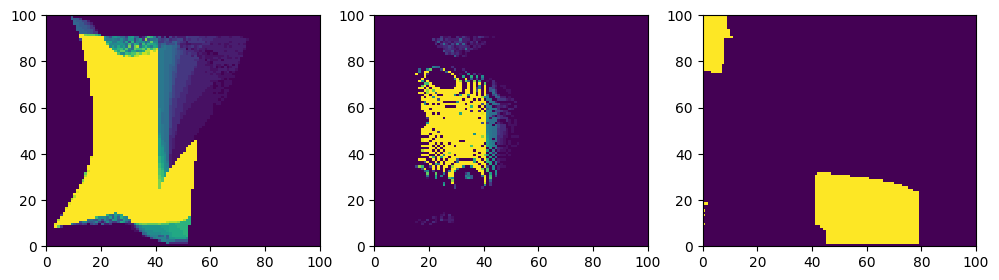

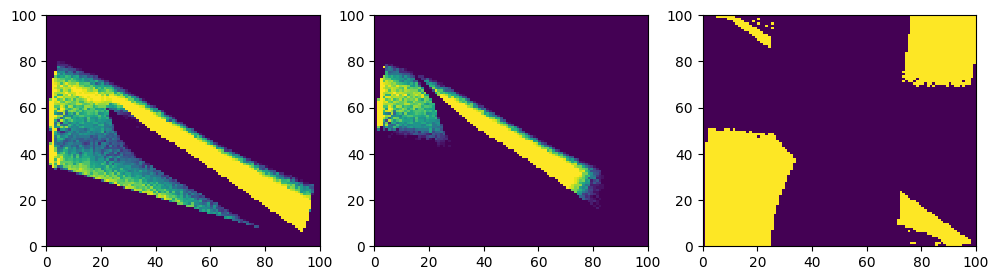

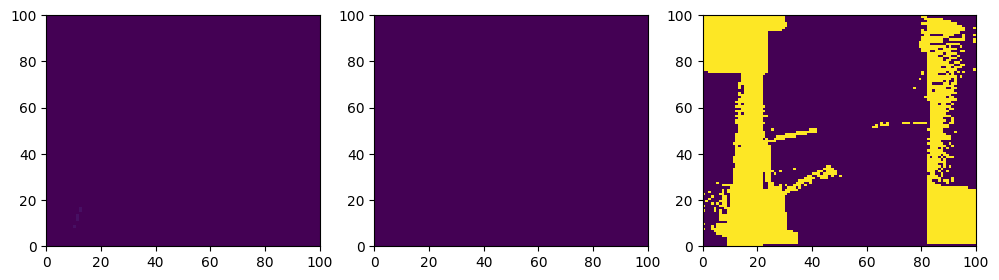

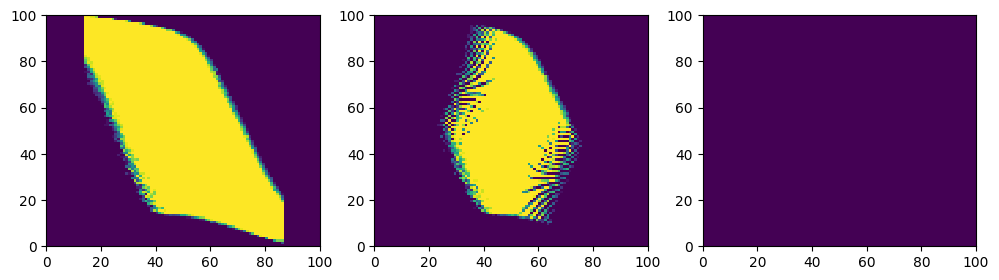

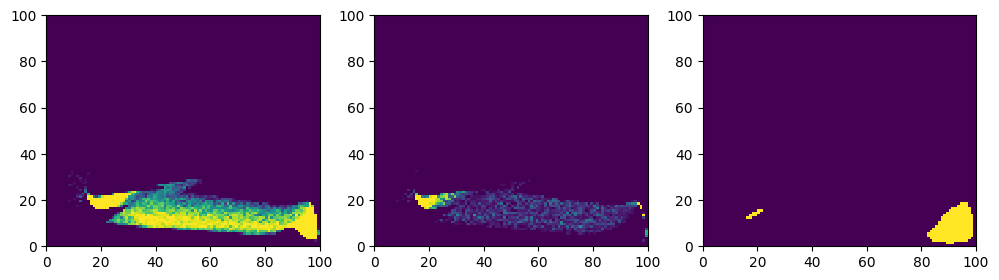

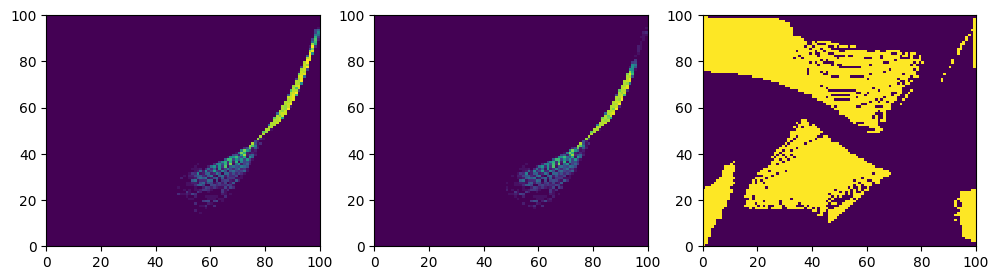

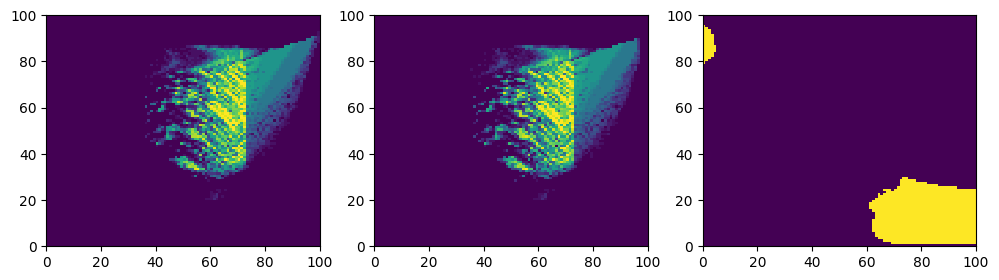

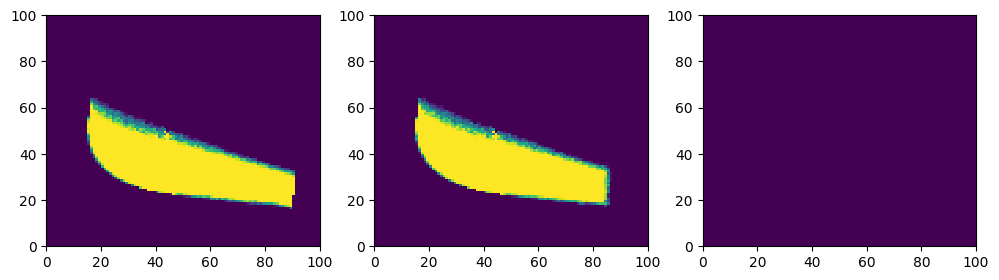

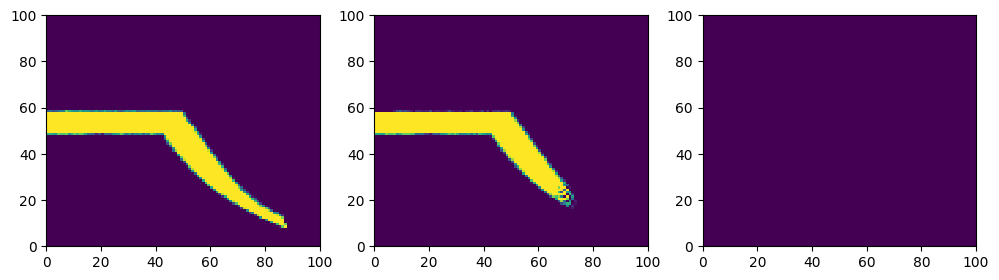

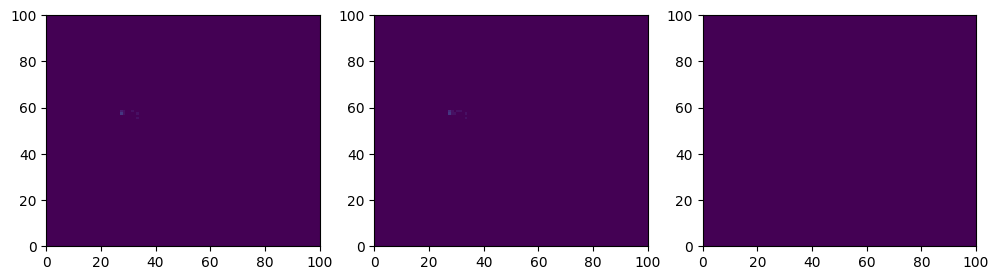

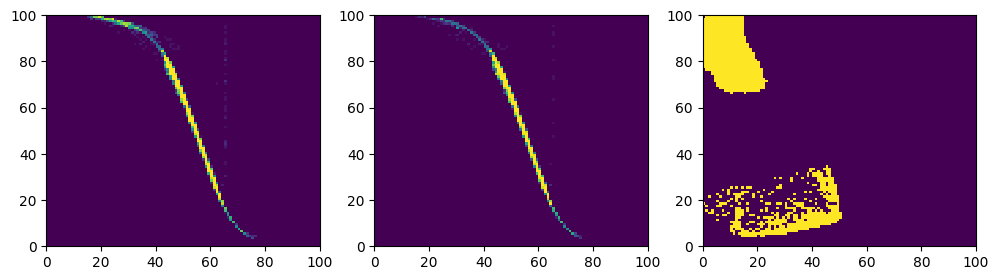

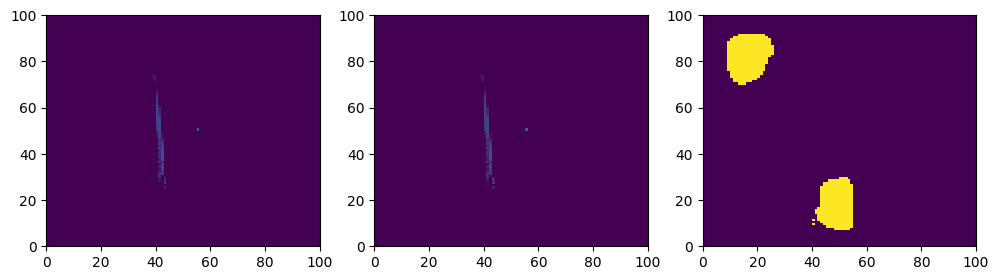

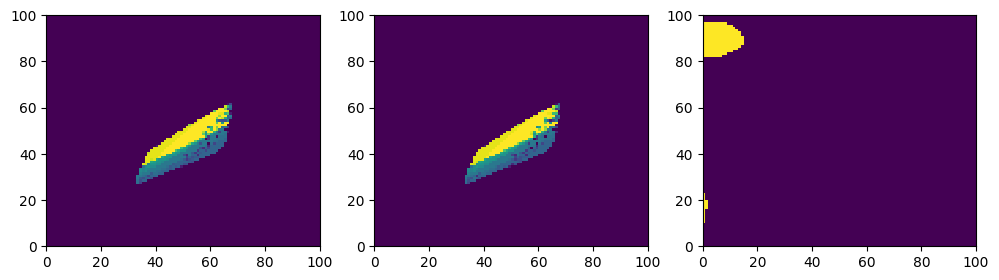

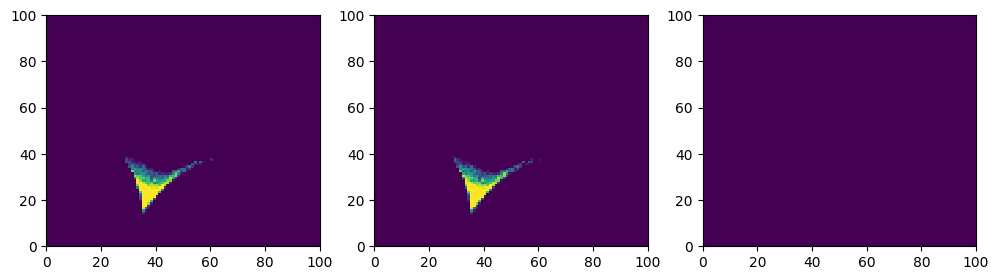

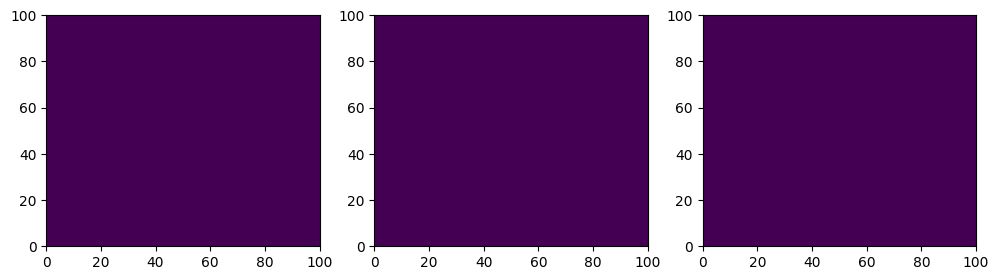

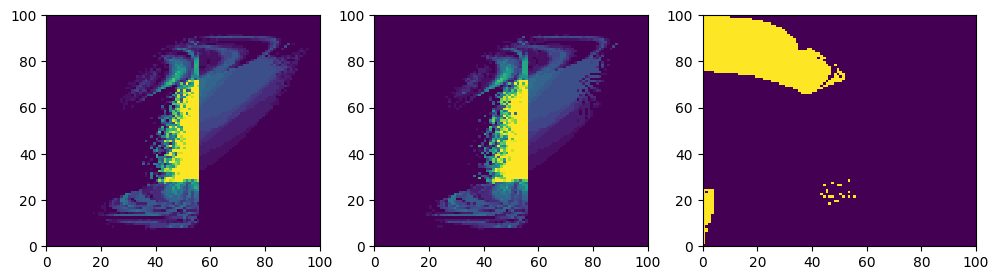

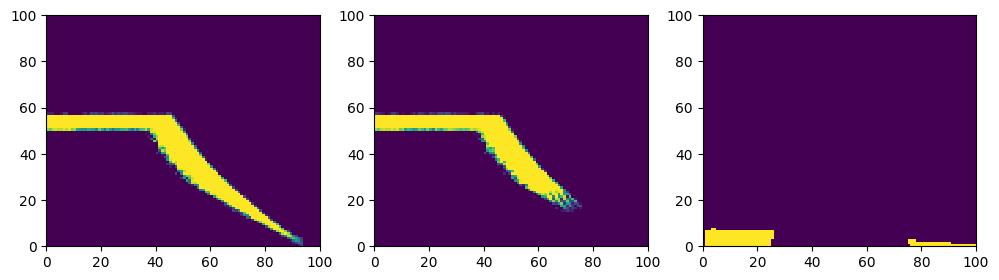

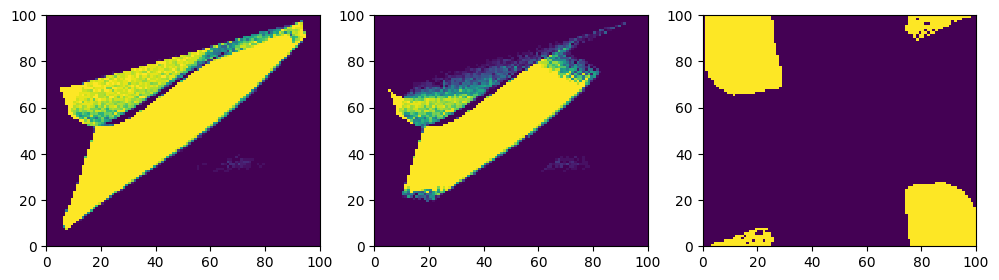

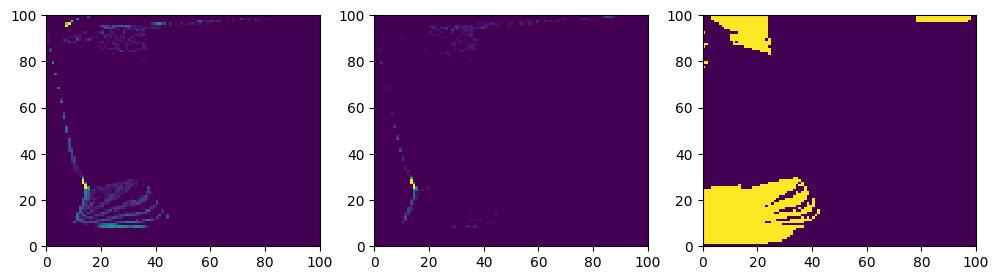

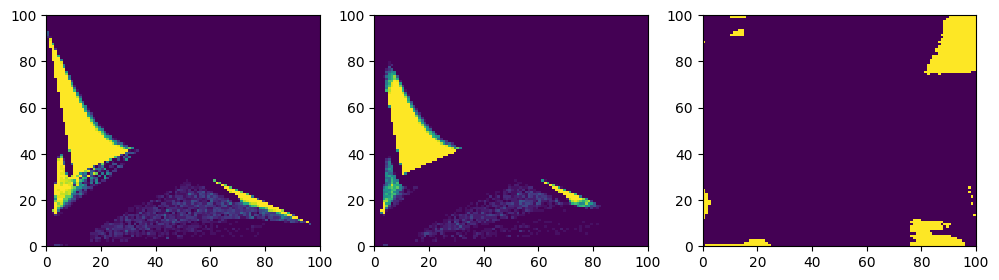

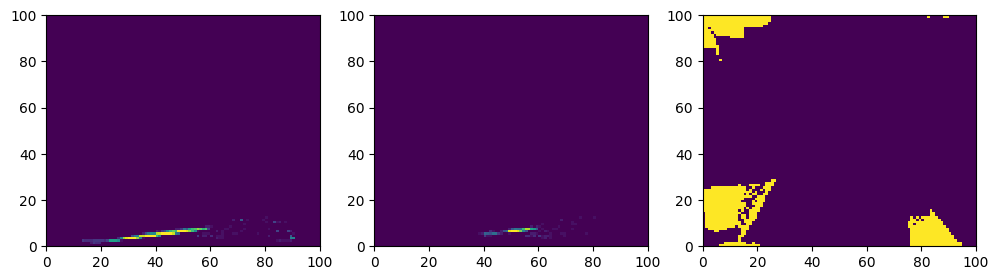

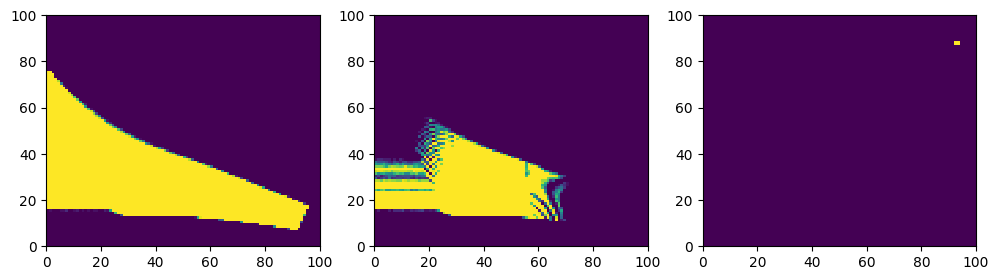

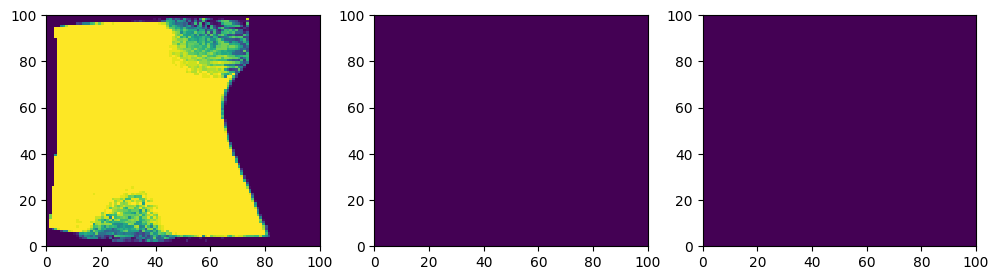

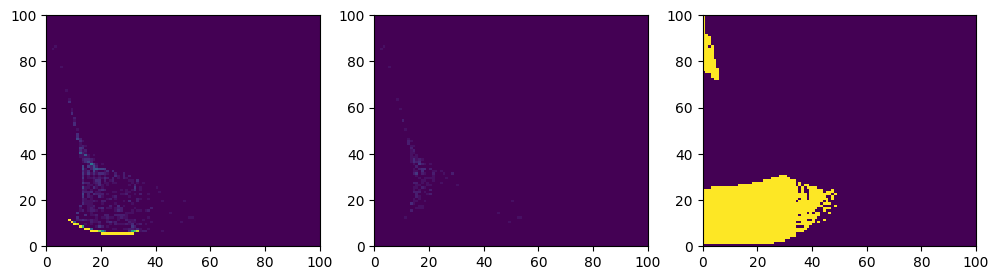

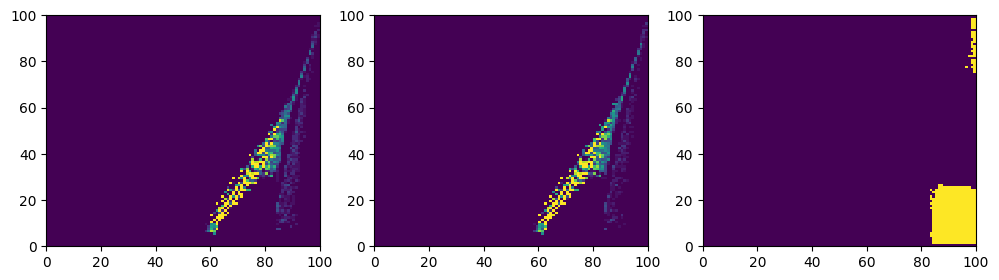

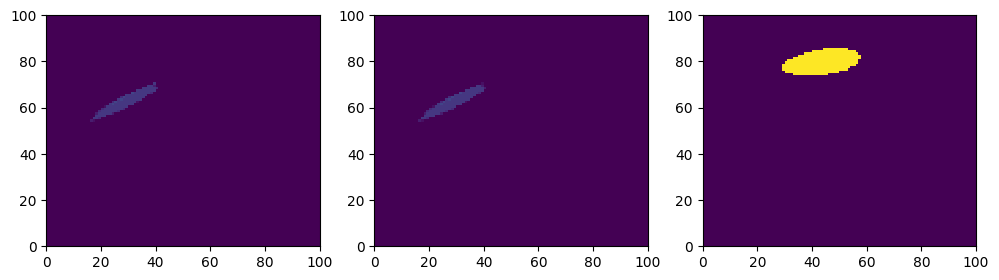

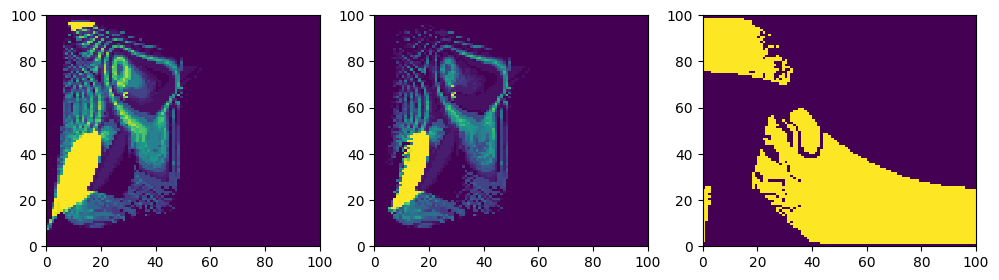

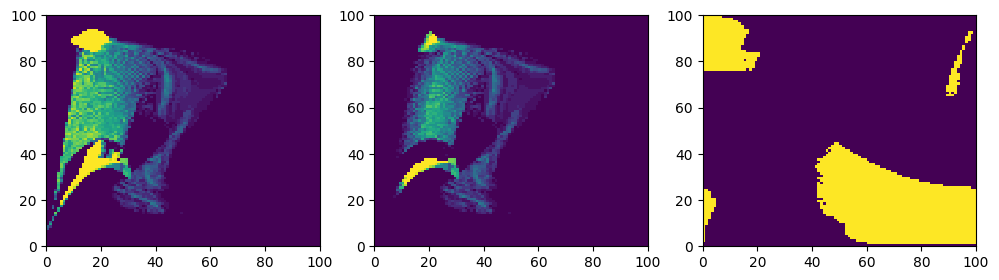

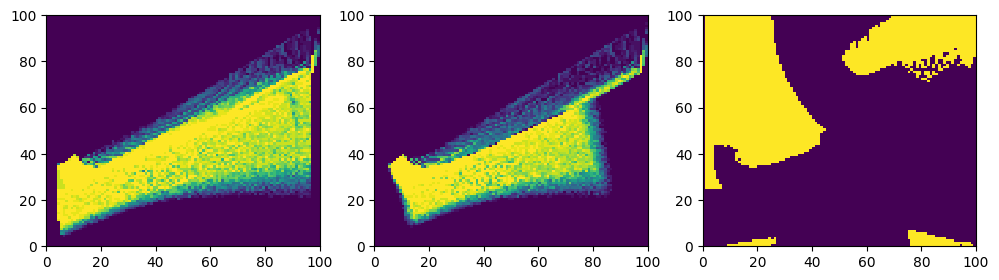

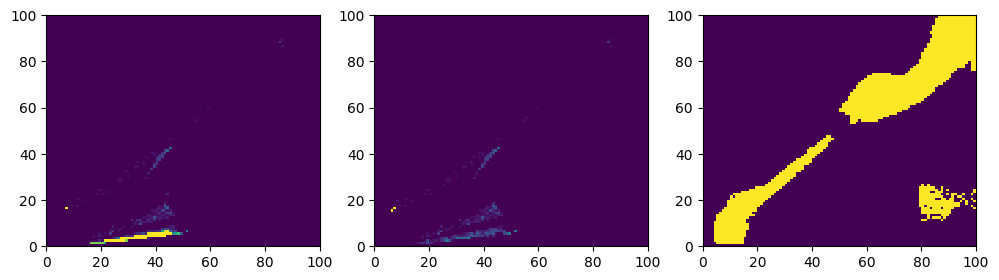

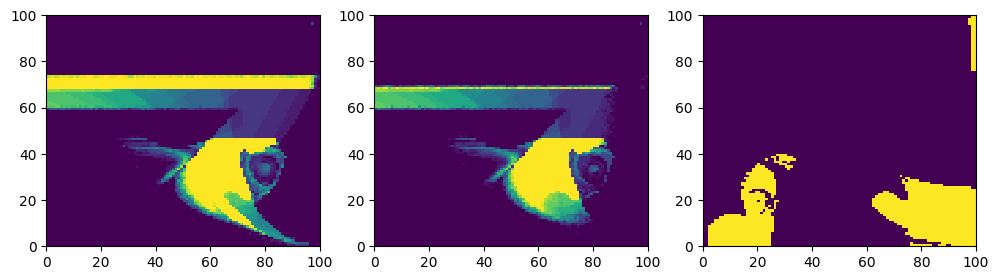

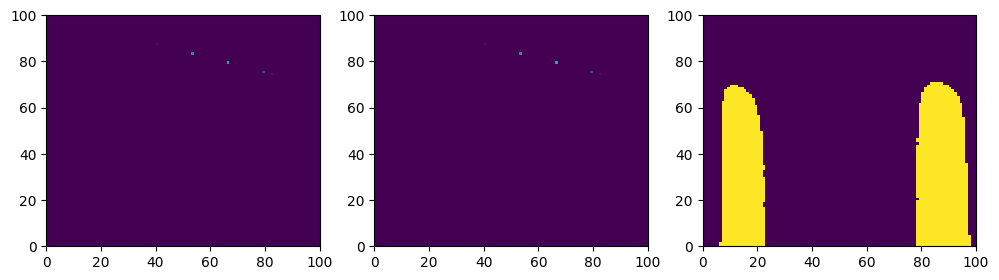

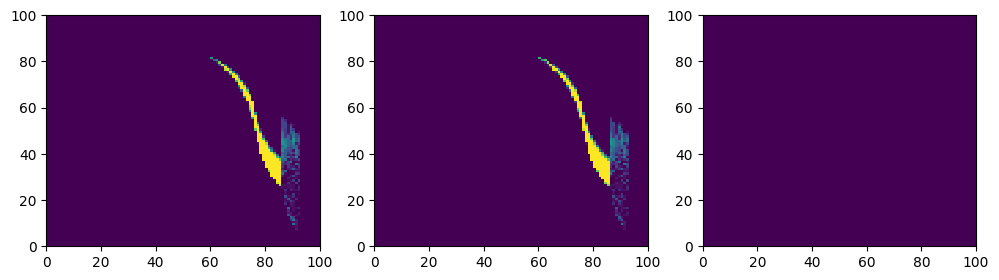

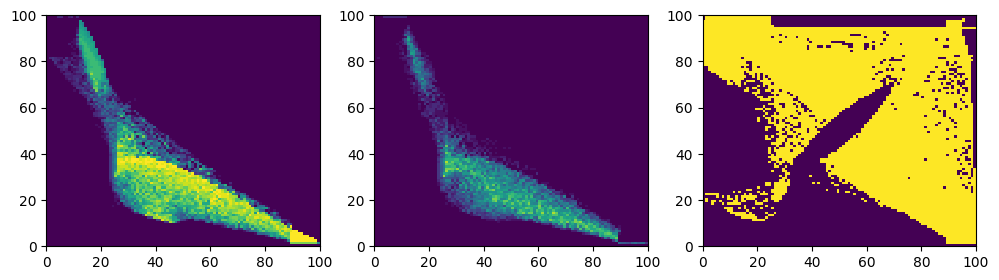

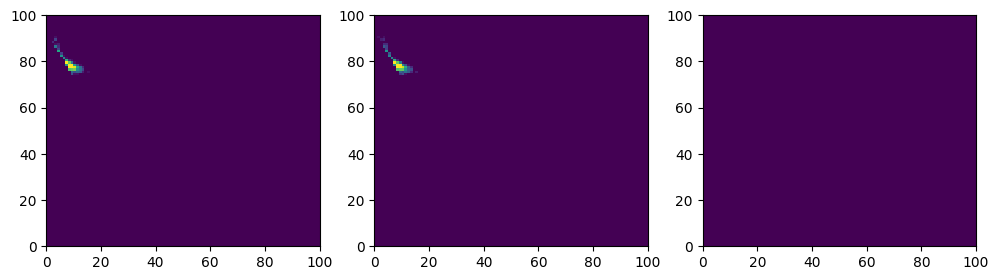

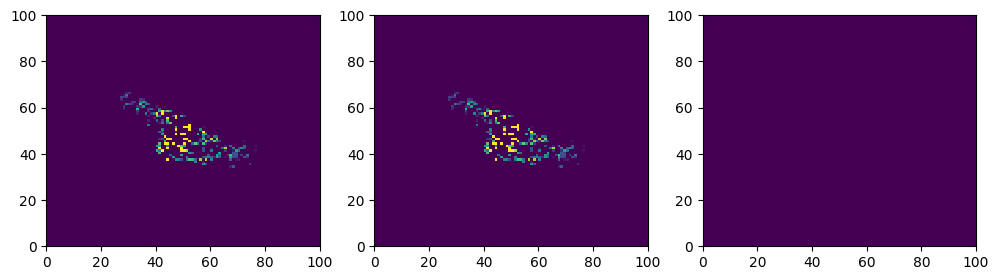

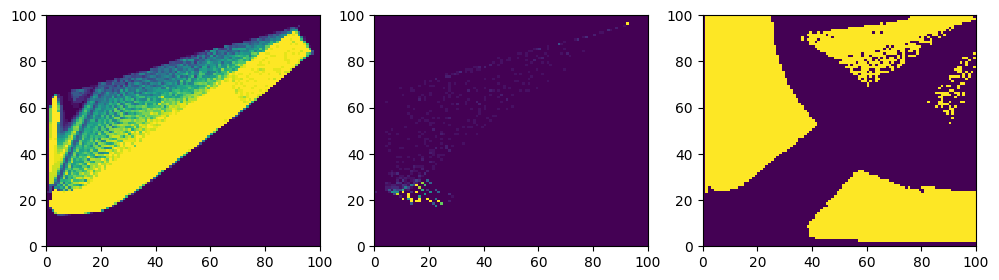

In [25]:
for i in range(100):
    hplc = np.loadtxt('./%s/HPLC.dat'%i)
    metaparspace = np.loadtxt('./%s/HPparslice_newrho_res5.dat'%i)
    metaparspace_HPoff = np.loadtxt('./%s/HPparslice_newrho_res5_HPofftest.dat'%i)
    fig, axs = plt.subplots(1,3,figsize=(12,3))
    axs[0].pcolormesh(metaparspace,vmax=25,vmin = 0)
    axs[1].pcolormesh(metaparspace_HPoff,vmax=25,vmin = 0)
    axs[2].pcolormesh(hplc)
    plt.show()

Realization: I think that the HPLC detection was probably partially flawed because the length of integration time is not adequate for hp mechanisms that have extreme targets (high or low, especially when it's both variables). HP can't move as fast (or at all) in one of its directions so it will be more likely to still be moving when the HPLC is being detected. So, in short, I really don't know whether it would be right to say that HPLCs are common even in 2D. I think they're possible (I still think #86 is a good example) but maybe that means i should just keep it as a thing to bring up in 3D?

Honestly there might be more real HPLCs at the borders, too, as trajectories which are pushed up against them oscillate back and forth across bifurcation lines. I would expect these are often not pyloric, but some might be partially or fully so

If i were doing this project over again, I would allow ADHP to run until it reaches some kind of steady state (movement stays below some threshold) OR loops back on itself (at least twice) OR some very absurdly long time. 

The question remains, is this something to be brought up in the 2d section or the 3d section? i definitely should not double back and say how it really happened (we looked back at our heterogeneous dataset and found it had HPLCs) because that's too convoluted and casts doubt. If i did bring it up in 2d id have to change the entire narrative, which a lot of my intuitions are based on there not being any HPLCs, which i think is mostly correct. Or at least they are not present for important/successful hp mechanisms, and especially not for the homogeneous dataset. 

I think it stays something that gets brought up in 3d with a strong emphasis on the fact that one of the things you need for it is an unstable dimension. 

So anyway then back to: what do i need to do to explain HPLCs and their impact? It would be great if i had data about their prevalence in 3D metaparameter space, but even if i did, i wouldn't trust it given the pointed out inaccuracies of the HPLC detection paradigm. So really the minimum that i would need is what i was trying to produce before; trajectories, ideally plotted coincidentally with pyloric region/volume, and maybe even more ideally highlighting the plane that we were previously considering in 2D. I've got three circuit players: #18 which was previously unstable and now is solvable, #___ which was previously solvable and now cannot avoid an HPLC, and #39 which I am demonstrating the prediction validity on, AND which was inseparable in 2D and we can now demonstrate is solvable in 3D

Maybe i can even use #39 to do this as it was indeed not solvable in 2D. Actually i think it may be one of the ones that i have been following as an example. Of course i don't have all the exact average values in 3d because the amount of data was prohibitive. What i do have (for EVERY circuit in the homogeneous dataset) is the averages for all three neurons on the 2D plane, which i should plot anyway and which i could then spread out along the py axis. But that might be prohibitively/deceptively close to the real thing/what you would actually need to do a prediction and people might think it's a mistake. And more than likely it doesn't particularly closely approximate the real thing (i.e. the 3D plot) anyway. All it would be serving to do is demonstrate half of the logic that i laid out in the first paragraph (new separability) without the second half of it (more points, both pyloric and non). and i was having trouble with the visualization of the 3d version of the scatter plots anyway. maybe with fewer points it wouldn't be that bad, but still it would be deceptive. Deceptive because it represents just one of the slices through the HP-accessible subspace and therefore is not predictive of performance. It's a necessary condition, but it is far from sufficient. It's better to present full points done the right way, not halfway nonsense. 

note that the HPparslice_3D files are incomplete. im guessing the supercomputer did not finish them

In [32]:
#which MFs are unsolvable in 3D
unsolvable3d = []
unsolvable2d = []

for i in range(100):
    hpparslice3d = np.loadtxt('../Specifically Evolved HP mechanisms/Every Circuit/%s/HPparslice_3D_res3.dat'%i)
    uns3d = (hpparslice3d.max()<27)
    if uns3d:
        unsolvable3d.append(i)
    hpparslice2d = np.loadtxt('../Specifically Evolved HP mechanisms/Every Circuit/%s/HPparslice_newrho_res5.dat'%i)
    uns2d = (hpparslice2d.max()<25)
    if uns2d:
        unsolvable2d.append(i)

print(unsolvable3d,len(unsolvable3d))
print(unsolvable2d,len(unsolvable2d))

[15] 1
[2, 9, 16, 18, 20, 24, 26, 28, 34, 39, 44, 64, 69, 75, 76, 81, 90, 95] 18


Solvable 2d but not in 3d: 15

Solvable 3d but not in 2d: 2, 9, 16, 18, 20, 24, 26, 28, 34, 39, 44, 64, 69, 75, 76, 81, 90, 95

Not solvable in either 2d or 3d: none

tbh, #15 was a strong candidate for the barely separable becoming inseparable argument. a very small region of separability that it would be easy for nonpyloric solutions to invade. i wonder if HPLCs was the right explanation?

In [33]:
traj = np.loadtxt('../Specifically Evolved HP mechanisms/Every Circuit/15/3D/biastrack.dat')

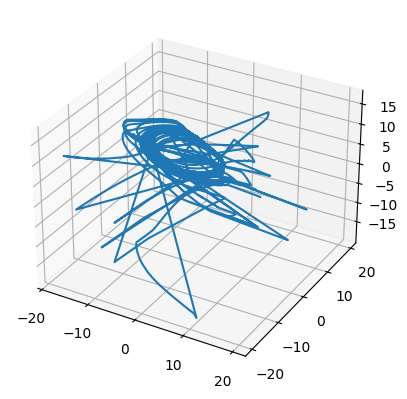

In [35]:
ax = plt.subplot(projection='3d')
ax.plot3D(traj[:,0],traj[:,1],traj[:,2])

In [36]:
#wait to be honest im not so sure that 15 is even really solvable in 2d... 
traj = np.loadtxt('../Specifically Evolved HP mechanisms/Every Circuit/15/5/biastrack.dat').reshape((25,-1,2))

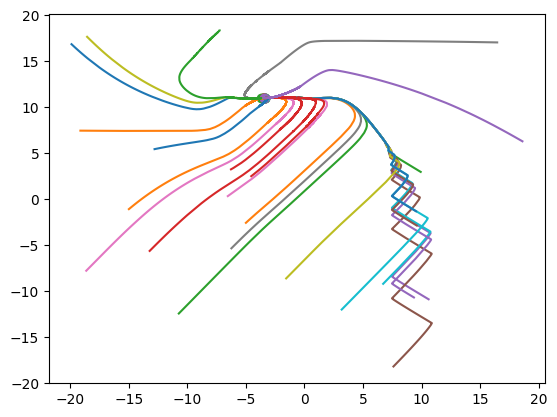

In [44]:
for i in range(25):
    plt.plot(traj[i,:,0],traj[i,:,1])
    plt.scatter(traj[i,-1,0],traj[i,-1,1])
plt.show()

Yes, it absolutely IS solvable in 2d, but like i said before only just barely. It appears that there are definitely HPLCs that exist in 3D. the tricky thing will be proving that they are truly unavoidable. 

Of course, if the entire pyloric region was unstable in the PY dimension then they would be unavoidable...

think of it like this: what could go wrong with the strategy of just setting 3D HP targets equal to averages at the 2D steady state? 1) there could be non-pylorics in the 3D subspace that invade that point, or 2) that point could be unstable with respect to that third dimension

So really I think that might be the better way to frame the failure of #15 in 3D. Yes, long-timescale limit cycles can achieve partial success by passing THROUGH the pyloric region, but the fundamental problem is that the pyloric region is destabilized in this third dimension. 